#Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.src.metrics import Precision, Recall

#Data Preprocessing

##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


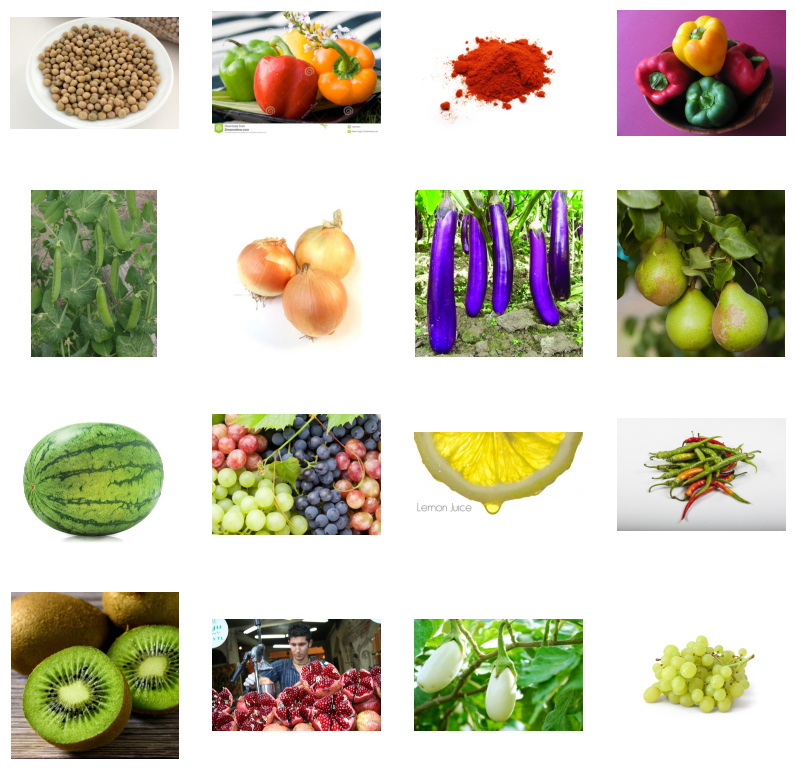

In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your test directory
train_PATH = 'Dataset/train'
valid_PATH = 'Dataset/validation'
test_PATH = 'Dataset/test'

# Get the list of all subdirectories (classes)
classes = os.listdir(train_PATH)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(train_PATH, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()

#Building Model

In [40]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [42]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [45]:
cnn.add(tf.keras.layers.Flatten())

In [46]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [47]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [48]:
cnn.add(tf.keras.layers.Dropout(0.3)) #To avoid overfitting

In [49]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [50]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

In [51]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from keras.src.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='Saved Models/best_model.keras', monitor="val_acc", mode="max",
                          save_best_only=True, verbose=1)

In [53]:
callbacks = [checkpoint]

In [54]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32, callbacks=callbacks)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 505ms/step - AUC: 0.4943 - Precision: 0.0252 - Recall: 0.0056 - accuracy: 0.0330 - loss: 24.9365 - val_AUC: 0.5015 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0313 - val_loss: 3.5829
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 474ms/step - AUC: 0.5036 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0325 - loss: 3.5801 - val_AUC: 0.5083 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0285 - val_loss: 3.5744
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 437ms/step - AUC: 0.5069 - Precision: 0.7099 - Recall: 0.0014 - accuracy: 0.0392 - loss: 3.5710 - val_AUC: 0.5188 - val_Precision: 1.0000 - val_Recall: 0.0028 - val_accuracy: 0.0313 - val_loss: 3.5589
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 503ms/step - AUC: 0.5291 - Precision: 0.4328 - Recall: 0.0020 - accuracy: 0.0369 - loss: 3.5609 - val_AUC: 0.5463 - val_Precision: 1.0000 - val_Recall: 0.0028 - val_accuracy: 0.0684 - val_loss: 3.5169
Epo

KeyboardInterrupt: 

##Evaluating Model

In [34]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

99/99 [==============================] - 57s 535ms/step - loss: 0.0203 - accuracy: 0.9936
Training accuracy: 0.9936407208442688


In [35]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 8s 275ms/step - loss: 0.2176 - accuracy: 0.9630
Validation accuracy: 0.9629629850387573


##Saving Model

In [36]:
cnn.save('trained_model.h5')

In [37]:
training_history.history #Return Dictionary of history

{'loss': [10.416428565979004,
  3.568152904510498,
  3.4487292766571045,
  3.1663429737091064,
  2.863342761993408,
  2.5651917457580566,
  2.1816065311431885,
  1.8584522008895874,
  1.4307835102081299,
  1.1429736614227295,
  0.9822124242782593,
  0.7506746649742126,
  0.6676167249679565,
  0.5358492136001587,
  0.4590623080730438,
  0.3969390392303467,
  0.38676315546035767,
  0.30101901292800903,
  0.3110937774181366,
  0.2600049078464508,
  0.21270045638084412,
  0.1999664604663849,
  0.24811379611492157,
  0.23089638352394104,
  0.23142395913600922,
  0.21508876979351044,
  0.22059503197669983,
  0.18947827816009521,
  0.18446986377239227,
  0.16286657750606537,
  0.1707410216331482,
  0.12031717598438263],
 'accuracy': [0.031160572543740273,
  0.046104926615953445,
  0.06550079584121704,
  0.1262321174144745,
  0.20667727291584015,
  0.28457871079444885,
  0.3662956953048706,
  0.4597774147987366,
  0.5767885446548462,
  0.6581876277923584,
  0.7233704328536987,
  0.777424454689

In [39]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [40]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [41]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 96.29629850387573 %


#Accuracy Visualization

##Training Visualization

In [42]:
#training_history.history['accuracy']

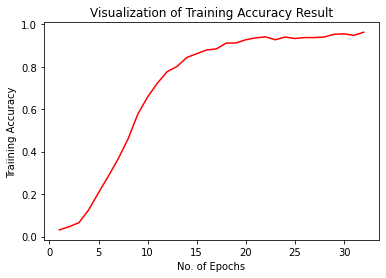

In [44]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

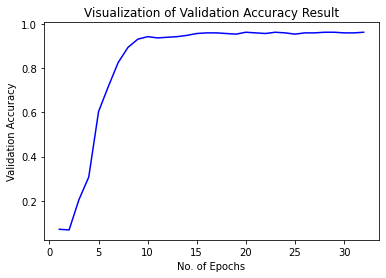

In [45]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [49]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [51]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 10s 186ms/step - loss: 0.2127 - accuracy: 0.9638
Test accuracy: 0.9637883305549622
